In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("../Data Collection/main_df_no_NAN_99p.csv").drop(columns="Unnamed: 0")
df = df.drop_duplicates(subset='ISIN').reset_index().drop(columns=["index"])
df_reg = df.groupby("Region of Headquarters").size().reset_index(name="Num Companies")

df_reg_ref = pd.DataFrame({"Region of Headquarters": ["Africa", "Americas", "Asia", "Europe", "Oceania"],
                           "Num Companies Ref": [550, 4200, 3100, 2500, 900]})

df_comb = pd.merge(df_reg, df_reg_ref, on="Region of Headquarters", how="left")

In [73]:
df_comb

,Region of Headquarters,Num Companies,Num Companies Ref
0,Africa,116,550
1,Americas,2520,4200
2,Asia,2042,3100
3,Europe,1884,2500
4,Oceania,384,900


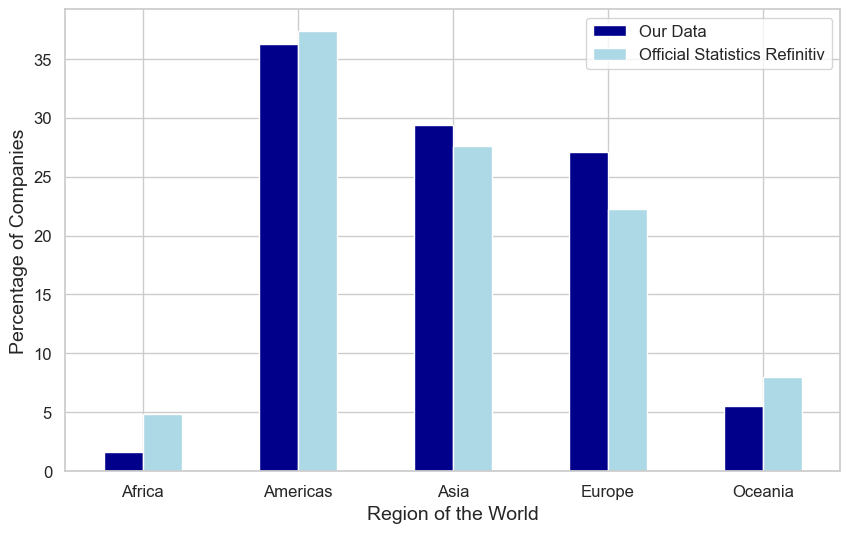

In [81]:
# Calculate percentages
df_comb['Our Data'] = df_comb['Num Companies'] / df_comb['Num Companies'].sum() * 100
df_comb['Official Statistics Refinitiv'] = df_comb['Num Companies Ref'] / df_comb['Num Companies Ref'].sum() * 100

# Create plot
sns.set(style="whitegrid")
ax = df_comb.plot(kind="bar", x="Region of Headquarters", y=["Our Data", "Official Statistics Refinitiv"],
                      figsize=(10, 6), rot=0, fontsize=12, color=['darkblue', 'lightblue'])
ax.set_xlabel("Region of the World", fontsize=14)
ax.set_ylabel("Percentage of Companies", fontsize=14)
ax.legend(loc='best', fontsize=12)
plt.show()